# <b>Fondamenti di Analisi Dati</b> - a.a. 2020/2021

In questo laboratorio vedremo le principali distribuzioni di probabilità e gli strumenti per verificare che i dati appartengano a una data distribuzione.

## 7 Distribuzioni di Probabilità Notevoli

Nello scorso laboratorio, abbiamo visto diversi strumenti per **descrivere** un campione di dati. Tutti questi strumenti tendono a sintetizzare alcune caratteristiche salienti dei dati così da poterne studiare meglio le proprietà. Dato un **campione** di dati, l'ideale sarebbe poter conoscere la **distribuzione di probabilità** della **popolazione** dalla quale il **campione** è stato estratto. La distribuzione di probabilità, nella sua forma analitica, rappresenta la **regola** con la quale sono stati **generati** i dati osservati. Tuttavia, per determinare il modello matematico esatto che ha generato i dati bisognerebbe conoscere ogni dettaglio del fenomeno fisico che genera i dati. In pratica, in determinati casi, i dati seguono delle distribuzioni notevoli. Se "ci accorgiamo" che il campione di dati in analisi segue una distribuzione notevole, possiamo effettuare il "fitting" del modello ai dati e ottenere un modello matematico esatto che descrive il fenomeno sotto analisi. Per un analista dei dati, è dunque importante "conoscere" e saper maneggiare le distribuzioni di probabilità notevoli.



Il modulo `scipy` implementa una serie di PDF notevoli. Utilizzeremo questo modulo per analizzare e plottare diverse distribuzioni.

### 7.1 Distribuzione Uniforme

Possiamo costruire una distribuzione uniforme mediante `uniform` del modulo `scipy.stats`. `uniform` prende in input due parametri `loc` e `scale`. La distribuzione avrà probabilità uniforme tra $loc$ e $loc+scale$, mentre varrà $0$ altrove. Costruiamo una distribuzione uniforme nell'intervallo $[10,20]$:

In [1]:
from scipy.stats import uniform
u = uniform(loc=10,scale=10)

L'oggetto $u$ implementa una distribuzione **uniforme**. Esso contiene, tra le altre cose, tre metodi importanti:
 * **pdf**: restituisce i valori della **PDF** associata alla distribuzione;
 * **cdf**: restituisce i valori della **CDF** continua associata alla distribuzione;
 * **ppf** (Percent Point Function): associa a un **percentile rank** (un valore compreso tra $0$ e $1$), il corrispondente **percentile**, ovvero, il valore al di sotto del quale si trova quella frazione di valori nella distribuzione. Si tratta della funzione inversa della **CDF** ristretta all'intervallo su cui la distribuzione è definita.
 
Vediamo alcuni esempi:

In [2]:
print(u.pdf(5), u.pdf(15), u.pdf(20), u.pdf(21))
print(u.cdf(5), u.cdf(15), u.cdf(20), u.cdf(21))
#ppf è l'inversa della CDF ristretta a [10,20]
print(u.ppf(0), u.ppf(0.5), u.ppf(1.0)) 

0.0 0.1 0.1 0.0
0.0 0.5 1.0 1.0
10.0 15.0 20.0


Vediamo una metodologia generale per plottare una distribuzione di probabilità. Inizieremo ottenendo dei buoni "margini" sull'asse $x$ per effettuare il plot. Sceglieremo dei valori tra i quali resta compresa tutta densità di probabilità. Poi plotteremo la **pdf** utilizzando quei margini:

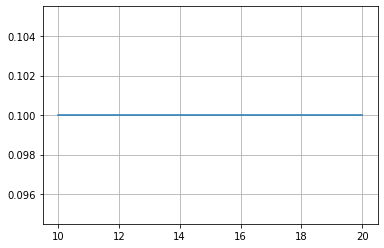

In [3]:
import numpy as np
from matplotlib import pyplot as plt
a = u.ppf(0) #scegliamo il valore corrispondente allo 0% della densità
b = u.ppf(1) #scegliamo il valore corrispondente al 100% della densità

x = np.linspace(a,b,100) #generiamo 100 valori equispaziati

plt.plot(x,u.pdf(x))
plt.grid()
plt.show()

Al di fuori dei valori visualizzati nel plot, la distribuzione assume valori nulli.

Plottiamo adesso la **CDF** e confrontiamola alla **PDF**:

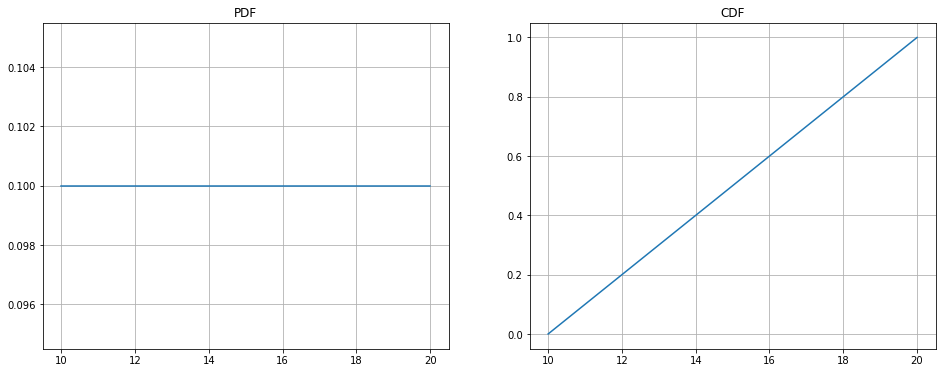

In [4]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('PDF')
plt.plot(x,u.pdf(x))
plt.grid()
plt.subplot(122)
plt.plot(x,u.cdf(x))
plt.title('CDF')
plt.grid()
plt.show()

Plottiamo invece la **PPF** econfrontiamola con la **CDF**:

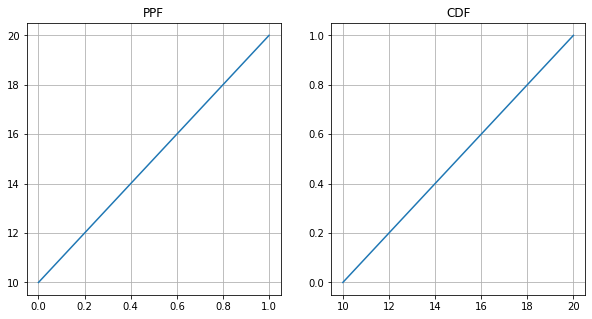

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(u.cdf(x),u.ppf(u.cdf(x)))
plt.title('PPF')
plt.grid()
plt.subplot(122)
plt.plot(x,u.cdf(x))
plt.title('CDF')
plt.grid()
plt.show()

### 7.2 Distribuzione Binomiale

La distribuzione Binomiale rappresenta la probabilità di avere $x$ esiti positivi ripetendo $n$ volte un processo Bernoulliano in cui si osserva esito positivo con probabilità $p$. Dato che la variabile indipendente $x$ rappresenta il numero di esiti positivi, la distribuzione è discreta. Vediamo qualche esempio di distribuzione binomiale:

In [6]:
from scipy.stats import binom

bn1 = binom(n=20, p=0.1)
bn2 = binom(n=20, p=0.2)
bn3 = binom(n=20, p=0.5)

Dato che la distribuzione è discreta, per essa non è definita una `pdf`, ma una `pmf`:

In [7]:
bn1.pmf(10)

6.442043387911576e-06

Definiamo una funzione per plottare pmf e cdf delle distribuzioni:

In [8]:
def plot_dist(dist, label=None, cdf=False):
    a = dist.ppf(0) 
    b = dist.ppf(1)
    
    #usiamo arange invece di linspace, perché la distribuzione è discreta
    x = np.arange(a,b)
    
    if cdf:
        plt.plot(x,dist.cdf(x), label=label)
    else:
        plt.plot(x,dist.pmf(x), label=label)

Plottiamo le tre distribuzioni:

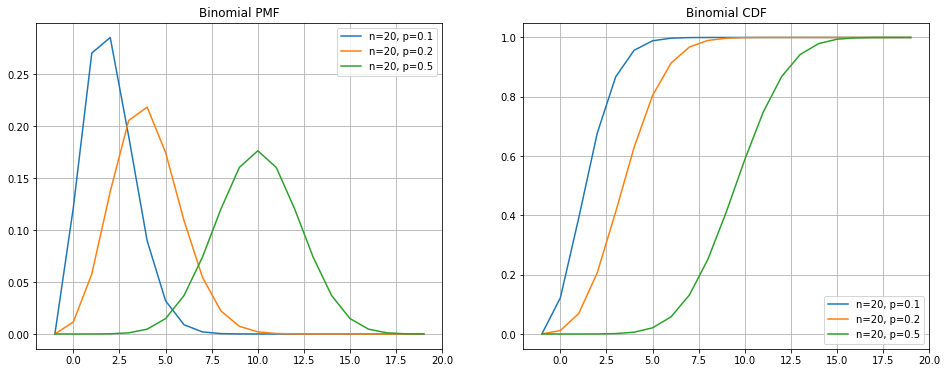

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Binomial PMF')
plot_dist(bn1,'n=20, p=0.1')
plot_dist(bn2,'n=20, p=0.2')
plot_dist(bn3,'n=20, p=0.5')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.title('Binomial CDF')
plot_dist(bn1,'n=20, p=0.1', cdf=True)
plot_dist(bn2,'n=20, p=0.2', cdf=True)
plot_dist(bn3,'n=20, p=0.5', cdf=True)
plt.grid()
plt.legend()
plt.show()

Le distribuzioni ottenute non sono molto "smooth". Vediamo cosa succede al crescere di $n$:

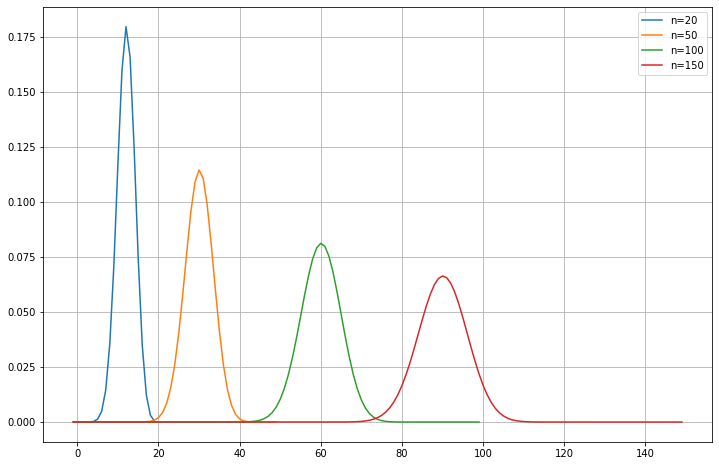

In [10]:
#generiamo 4 distribuzioni binomiali
ns = [20,50,100,150]
binoms=[binom(n=i, p=0.6) for i in ns]

plt.figure(figsize=(12,8))
for b,n in zip(binoms,ns):
    plot_dist(b,'n='+str(n))
plt.legend()
plt.grid()
plt.show()

### 7.3 La distribuzione Gaussiana

Secondo il teorema del limite centrale, la somma di un grosso numero di variabili aleatorie **indipendenti e identicamente distribuite** è **approssimativamente Gaussiana**, indipendentemente dalla distribuzione di probabilità seguita delle singole variabili. Ciò fa si che molti fenomeni complessi (frutto della combinazione di più fenomeni semplici) seguano una distribuzione Gaussiana. In pratica, quando osserviamo che i valori di un campione tendono a **concentrarsi attorno a un valore medio**, la distribuzione Guassiana è spesso una buona approssimazione della distrubuzione della popolazione dalla quale il campione è stato estratto.

La forma analitica della distribuzione Gaussiana è la seguente:

\begin{equation}
G(x;\mu,\sigma^2)={\frac  {1}{\sigma {\sqrt  {2\pi }}}}\;e^{{-{\frac  {\left(x-\mu \right)^{2}}{2\sigma ^{2}}}}}~{\mbox{ con }}~x\in {\mathbb  {R}}
\end{equation}

dove:
 * $x$ è la variabile indipendente;
 * $\mu$ e $\sigma^2$ sono rispettivamente **media** e **varianza** della distribuzione ($\sigma=\sqrt{\sigma^2}$).
 
In pratica, la distribuzione Gaussiana è **parametrizzata** da $\mu$ e $\sigma^2$. Ciò significa che una distribuzione Gaussiana è **totalmente individuata** da due precisi valori di $\mu$ e $\sigma^2$ e che due valori di $\mu$ e $\sigma^2$ individuano **una determinata distrubuzione Gaussiana**. Scegliamo ad esempio:
 
 * $\mu=0$;
 * $\sigma^2=1$;

e plottiamo i valori assunti dalla Gaussiana caratterizzata da questi due parametri e la relativa CDF. Utilizzeremo l'oggetto `norm` messo a disposizione da `scipy`. Il costruttore di `norm` accetta in input la media e la **deviazione standard** della Gaussiana:

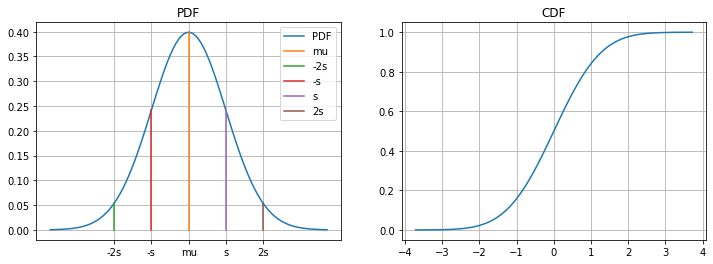

In [11]:
from scipy.stats import norm
mu=0
s=1
g = norm(mu,s)

#dato che gli estremi di una distribuzione Gaussiana
#sono -inf e +inf, individuiamo un intervallo che contenga il 99.98% della densità
a = g.ppf(0.0001) 
b = g.ppf(0.9999)

x = np.linspace(a,b,100)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('PDF')
plt.plot(x,g.pdf(x),label='PDF')
plt.plot([mu,mu],[0,g.pdf(mu)], label='mu')
plt.plot([-2*s,-2*s],[0,g.pdf(-2*s)], label='-2s')
plt.plot([-s,-s],[0,g.pdf(-s)], label='-s')
plt.plot([s,s],[0,g.pdf(s)], label='s')
plt.plot([2*s,2*s],[0,g.pdf(2*s)], label='2s')
plt.xticks([-2*s,-s,mu,s,2*s],['-2s','-s','mu','s','2s'])
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.title('CDF')
plt.plot(x,g.cdf(x))
plt.grid()
plt.show()

#### 7.3.1 Fit dei parametri di una distribuzione Gaussiana

Supponiamo di avere tutti i dati di una popolazione e supponiamo di sapere che essi sono descritti da una Gaussiana. Come facciamo a trovare la Gaussiana che descrive meglio i dati? In questo contesto, trovare tale Gaussiana significa determinare due valori per i parametri $\mu$ e $\sigma^2$ tali che la Gaussiana $G$ "spieghi bene" i dati. I parametri possono essere determinati calcolando media e varianza così come abbiamo visto nel caso della statistica descrittiva:

\begin{equation}
\mu = \frac{1}{N} \sum_{i=0}^{N} x_i; \ \ \ \ \ \ \ \sigma^2=\frac{1}{N}\sum_{i=0}^{N}(x_i-\mu)^2
\end{equation}

dove $x_i$ è l'elemento $i$-esimo della popolazione, $\mu$ è la media della popolazione e $\sigma^2$ è la varianza. Una volta individuati i due parametri $\mu$ e $\sigma^2$, la Gaussiana che descrive la popolazione sarà data da $G(x;\mu, \sigma^2)$. Diremo dunque di aver effettuato il "fit" della distribuzione ai dati.

#### 7.3.2 Varianza Campionaria vs Varianza della Popolazione



Abbiamo visto che, se l'intera popolazione è nota, possiamo facilmente individuare la **distribuzione Gaussiana** che la caratterizza. In genere tuttavia non abbiamo accesso alla **popolazione** oggetto di studio ma solo ad un suo **campione**. In questo caso, per trovare **media e varianza della popolazione**, è necessario utilizzare degli **stimatori** (li chiamiamo "stimatori" perché stimano - a meno di un errore - media e varianza della popolazione a partire da un campione di essa). Gli stimatori più comuni sono gli stimatori della **media e varianza campionaria**:

\begin{equation}
\overline x = \frac{1}{N} \sum_{i=0}^{N} x_i; \ \ \ \ \ \ \ s_N^2=\frac{1}{N}\sum_{i=0}^{N}(x_i-\overline x)^2
\end{equation}

In pratica, è dimostrato che lo stimatore $s_N^2$ **sottostima sistematicamente la varianza**, ovvero che **il valore atteso dello stimatore $s_N^2$ è inferiore alla varianza della popolazione $\sigma^2$**:

\begin{equation}
\mathbf{E}[s_N^2]=\frac{N-1}{N}\sigma^2
\end{equation}

Si dice dunque che lo stimatore **è distorto**. Ciò è particolarmente **rilevante** per piccoli valori di $N$ (ovvero per piccoli campioni). Per grandi valori di $N$ infatti, il rapporto $\frac{N-1}{N}$ tende a $1$ e la differenza tra il valore stimato $s_N^2$ e la varianza reale $\sigma^2$ è trascurabile.

E' dunque possibile definire un nuovo stimatore **non distorto** per la varianza:

\begin{equation}
s_{N-1}^2=\frac{1}{N-1}\sum_{i=0}^{N}(x_i-\overline x)^2
\end{equation}

**NOTA:** Cosa si intende per valore atteso di $s_N^2$? Il valore atteso è un concetto molto legato a quello di **media**. Possiamo vederla così: supponiamo di avere una popolazione e di estrarre da essa un campione di numerosità $N$. Possiamo stimare la varianza della popolazione $\sigma^2$ utilizzando lo stimatore $s_N^2$. Supponiamo ora di estrarre un altro campione di numerosità $N$ e di stimare nuovamente la varianza mediante $s_N^2$. Non abbiamo alcuna garanzia che le due varianze stimate siano uguali perché i campioni usati per stimarli possono essere diversi. Supponiamo di ripetere l'operazione di estrazione di un campione e stima della varianza all'infinito. Otterremmo una popolazione di stime della varianza $\sigma^2$. La media di questi valori è **il valore atteso di $s_N^2$**. Ci aspettiamo che, estraendo un numero infinito di campioni sia possibile stimare la varianze $\sigma^2$ come valore atteso $\mathbf{E}[s_N^2]$, ma in pratica otterremo sempre un valore **distorto**. A differenza di quanto avviene con lo stimatore distorto $s_N^2$, lo stimatore $s_{N-1}^2$ è **non distorto**. Ciò significa che il valore atteso $\mathbf{E}[s_{N-1}^2]$ è proprio $\sigma^2$.

Consideriamo un semplice esempio. Generiamo un campione piccolo che segue una distribuzione Normale:

In [12]:
import pandas as pd
np.random.seed(1234)
#generiamo un campione di 70 elementi che segue una distribuzione normale
sample = pd.Series(np.random.normal(0,1,70))

Di default, il metodo `var` di `Pandas` restituisce una stima non distorta della varianza. Se vogliamo ottenere una stima distorta, dobbiamo specificare `ddof=0`:

In [13]:
print("Stima distorta della varianza",sample.var(ddof=0))
print("Stima non distorta della varianza",sample.var())

Stima distorta della varianza 0.9767042085310298
Stima non distorta della varianza 0.9908593419880013


Si noti che lo stimatore distorto della varianza sottostima la varianza della popolazione ($1$).

#### 7.3.3 Fit "compatto" della distribuzione ai dati

Ogni oggetto `scipy` che implementa una distribuzione di probabilità mette a disposizione una funzione `fit` che permette di effettaure il fit dei parametri a partire da un campione. Vediamo un esempio nel caso Gaussiano:

In [14]:
np.random.seed(12345)
#generiamo un campione distribuito secondo
#una Gaussiana di media -1 e deviazione standard 5
sample=np.random.normal(-1,5,1000)

print(norm.fit(sample))

(-1.0117535550347085, 4.897331364273303)


La fuzione `fit` ha restituito la stima rispettivamente della media e della varianza. Possiamo combinare questo risultato con la notazione `*` per effettuare il fit e la costruizione della distribuzione al volo:

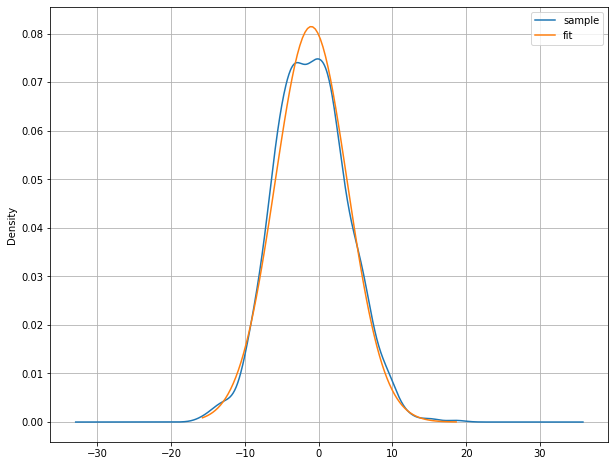

In [15]:
plt.figure(figsize=(10,8))
pd.Series(sample).plot.density()
g=norm(*norm.fit(sample))
x=np.linspace(sample.min(),sample.max(),100)
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['sample','fit'])
plt.show()

### 7.4 Distribuzione Laplaciana

La distribuzione Laplaciana si ottiene utilizzando `laplace` e specificando media e diversità come parametri. Vediamo un esempio su come plottare questa distribuzione:

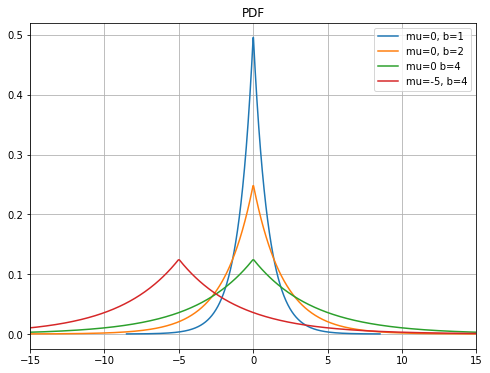

In [16]:
from scipy.stats import laplace

def plot_pdf(ls, labels):
    plt.figure(figsize=(8,6))
    for l,label in zip(ls,labels):
        a = l.ppf(0.0001) 
        b = l.ppf(0.9999)

        x = np.linspace(a,b,1000)

        plt.title('PDF')
        plt.plot(x,l.pdf(x), label=label)
    plt.legend()
    plt.grid()
        
l1 = laplace(0,1)
l2 = laplace(0,2)
l3 = laplace(0,4)
l4 = laplace(-5,4)

plot_pdf([l1,l2,l3,l4],['mu=0, b=1','mu=0, b=2', 'mu=0 b=4', 'mu=-5, b=4'])
plt.xlim([-15,15])
plt.show()

Confrontiamo la CDF di una distribuzione Gaussiana con quella di una distribuzione Laplaciana.

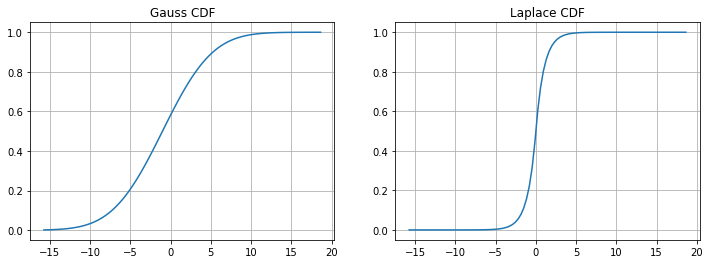

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Gauss CDF')
plt.plot(x,g.cdf(x))
plt.grid()
plt.subplot(1,2,2)
plt.title('Laplace CDF')
plt.plot(x,l1.cdf(x))
plt.grid()
plt.show()

#### 7.4.1 Fit dei parametri
La stessa procedura vista nel caso della Gaussiana, può essere applicata a una Laplaciana e in generale a una qualsiasi distribuzione:

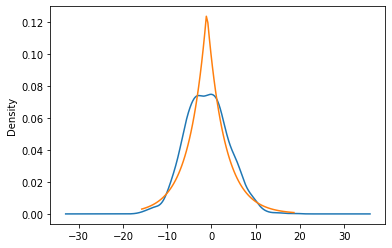

In [18]:
l=laplace(*laplace.fit(sample))
pd.Series(sample).plot.density()
x=np.linspace(sample.min(),sample.max(),100)
plt.plot(x,l.pdf(x))
plt.show()

### 7.5 Distribuzione di Poisson

La distribuzione di Poisson è una distribuzione di probabilità discreta calcolata in un intervallo di tempo T.
Sia $\lambda$ il numero medio di occorrenze del fenomeno sotto studio durante l'intervallo T.
La distribuzione di Poisson fornisce la probabilità che durante un intervallo T si verifichino n
occorrenze del fenomeno mediante la formula:

\begin{equation}
P(n,\lambda) = {\frac{\lambda^n}{n!}e^{-\lambda}} \ \ \ {\forall n \in \mathbb{N}}
\end{equation}

Vediamo un esempio:

In [19]:
from scipy.stats import poisson
#distribuzione di Poisson con lambda = 4 e n=10
p = poisson(4,10)

Plottiamo la distribuzione:

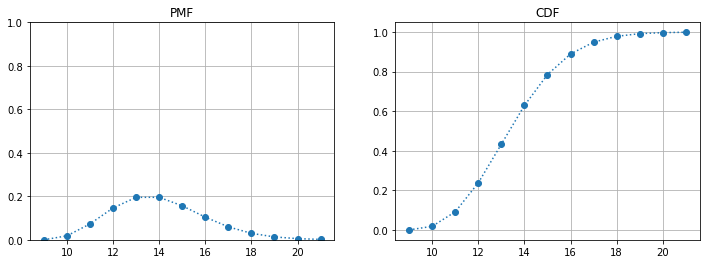

In [20]:
#la distribuzione di Poisson è definita solo su numeri naturali,
#quindi usiamo "arange" invece di "linspace"
x = np.arange(p.ppf(0.001)-1,p.ppf(0.999)+1)


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('PMF')
plt.plot(x,p.pmf(x),':o')
plt.ylim([0,1])
plt.grid()

plt.subplot(122)
plt.title('CDF')
plt.plot(x,p.cdf(x),':o')
plt.grid()
plt.show()

### 7.6 Verificare l'Appartenenza dei Dati a una Distribuzione

Abbiamo detto che i dati possono essere descritti "trovando" la distribuzione alla quale essi appartengono. Ciò si ottiene effettuando il "fit" della distribuzione ai dati, ovvero trovando dei valori opportuni dei parametri della distribuzione che fanno sì che la distribuzione "spieghi bene" i dati. Tale procedura avviene in due passaggi:
 1. Si individua una distribuzione che "spieghi bene" il fenomeno;
 * Si effettua il fit della distribuzione ai dati.

**Un semplice esempio**: in un dado a $6$ facce non truccato, ogni faccia ha la stessa probabilità di uscire in un lancio del dado. La distribuzione di probabilità che descrive il fenomeno "al lancio del dado è uscito il numero $x$" è chiaramente una **distribuzione uniforme discreta**. Tale distribuzione è simile alla **distribuzione uniforme continua** ma è definita su un insieme finito. Il "parametro" di tale distribuzione è l'insieme stesso. Definendo tale insieme come $\{1,2,3,4,5,6\}$ abbiamo effettuato il fit della distribuzione e trovato una distribuzione che descrive bene il fenomeno.

In casi più complessi, tuttavia, non è sempre chiaro come effettuare il passo $1$, ossia come determinare la distribuzione che meglio "spiega" i dati. Fortunatamente esistono degli strumenti grafici e matematici per verificare l'appartenenza dei dati a una distribuzione.

Utilizzeremo nuovamente un dataset di pesi e altezze per vedere degli esempi concreti (sottoinsieme di dati estratti dal National Health Interview Survey - http://www.cdc.gov/NCHS/NHIS.htm):

In [21]:
import pandas as pd
data=pd.read_csv('height_weight.csv')
data.head()

,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


Supponiamo di sapere per certo che i pesi si distribuiscono secondo una distribuzione Gaussiana ed effettuiamo il fit dei parametri. Confrontiamo dunque la Gaussiana trovata con l'istogramma di densità e la stima di densità del campione:

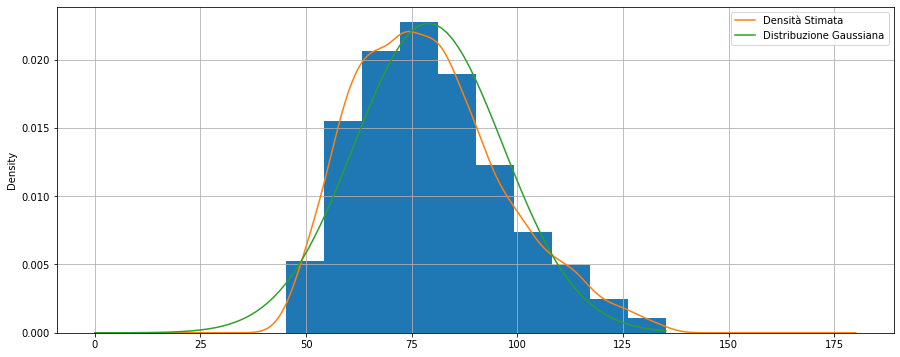

In [22]:
mu = data['weight'].mean()
sigma = data['weight'].std()

g = norm(mu,sigma)
x=np.linspace(0,data['weight'].max(),100)

plt.figure(figsize=(15,6))
data['weight'].plot.hist(20,density=True)
data['weight'].plot.density()
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])
plt.show()

#### 7.6.1 Confronto mediante CDF
Il confronto tra la densità stimata e la Gaussiana non è sempre chiarissimo da leggere. Inoltre, gli strumenti per la stima della distribuzione empirica dei dati sono spesso soggetti al rumore. Un modo più robusto per verificare visualmente se un campione segue una tale distirbuzione consiste nel confrontare la **CDF** ottenuta dai dati con la **CDF** teorica della distribuzione. Vediamo un esempio:

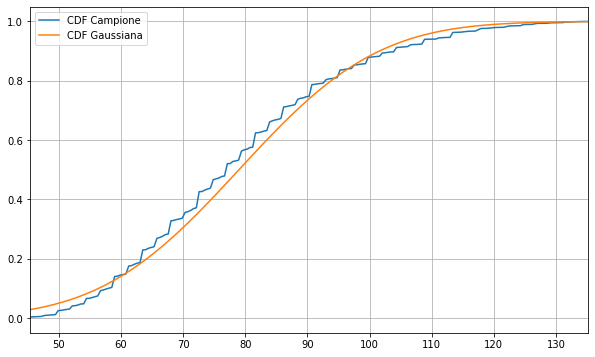

In [23]:
cdf_weight = data['weight'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(10,6))
cdf_weight.plot()
plt.plot(x,g.cdf(x))
plt.grid()
plt.legend(['CDF Campione','CDF Gaussiana'])
plt.show()

Il plot ci permette di fare alcune considerazioni qualitative sulle due distribuzioni. In particolare, le due **CDF** si "assomigliano", tuttavia ci sono delle discrepanze in alcuni punti:

* La CDF del campione assume valori più piccoli della CDF Gaussiana teorica sotto il ventesimo percentile ($y\leq 0.2$) e sopra l'ottantesimo percentile ($y\gt0.8$). Questi valori sono in corrispondeza di circa 60Kg e 90Kg. Ciò vuol dire che **ci sono meno soggetti sotto i 60Kg di quanti ce ne aspetteremmo in una distribuzione Gaussiana** e che **ci sono meno soggetti sopra i 90Kg di quanti ce ne aspetteremmo in una distribuzione Gaussiana**.
* La CDF del campione assume valori più grandi della CDF Gaussiana teorica tra $y=0.2$ e $y=0.8$, ciò vuol dire che **ci sono più soggetti tra i 60Kg e i 90Kg di quanti ce ne aspetteremmo in una distribuzione Gaussiana**.

### 7.7 Plot Quantile-Quantile (Q-Q Plot)

Osservando il confronto tra le CDF non è facile quantificare quanto le discrepanze siano in effetti significative. Un altro modo di controllare che un campione segua una data distribuzione consiste nell'usare un **Plot Quantile-Quantile (Q-Q Plot)**. L'idea di base è confrontare i quantili della distribuzione empirica dei dati con i quantili teorici della distribuzione di riferimento. Per evitare problemi di scala, i dati empirici vengono prima transformati in **z-score**. Se il campione segue la distribuzione teorica, i quantili saranno uguali. Plottando i quantili empirici rispetto a quelli teorici dovremmo dunque ottenere un insieme di punti che giacciono sulla linea $y=x$. Un Q-Q plot può essere ottenuto facilmente utilizzando la funzione **qqplot** di **statsmodels**. Plottiamo un **Q-Q Plot** per verificare (o confutare) la gaussianità del campione dei pesi:

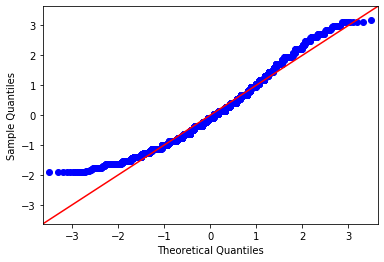

In [24]:
from statsmodels.graphics.gofplots import qqplot

#fit=True indica che bisogna fare fit della distribuzione sui dati
#e che bisogna inoltre standardizzare i dati
#line='45' indica di plottare una linea a 45 gradi per riferimento
qqplot(data['weight'], fit=True, line='45')
plt.show()

Il plot mette in relazione i quantili "teorici" con quelli del campione. Il fatto che i punti del plot non giacciano sulla diagonale indica che c'è una discrepanza tra la distribuzione empirica dei dati e quella Gaussiana. 

Un Q-Q- Plot può essere ottenuto anche considerando distribuzioni teoriche diverse. Per farlo dobbiamo passare alla funzione **qqplot** la distribuzione (importata da `scipy.stats`). Proviamo a testare se il campione segue una distribuzione Laplaciana:

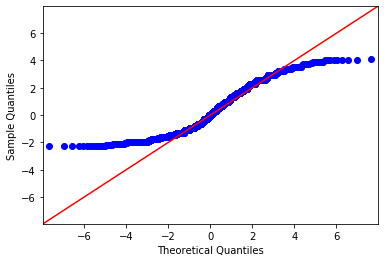

In [25]:
from scipy.stats import laplace

qqplot(data['weight'], fit=True, line='45', dist=laplace)
plt.show()

Per confrontare le distribuzioni di due sample distinti utilizziamo la funzione <b>qqplot_2samples</b>.
<br><br>
<b>N.B.:</b> qqplot_2samples non normalizza i nostri dati e quindi è bene fare lo <b>zscore</b> dei nostri sample

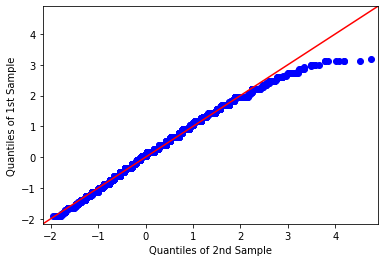

In [59]:
from scipy.stats import zscore
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(zscore(data['weight']), zscore(data['BMI']), line='45')
plt.show()

#### 7.7.1 Analizzare i Q-Q Plot

Analizzare un Q-Q Plot può essere complesso. In pratica, esistono alcune linee guida per capire in che modo un campione devia da una distribuzione teorica. Facendo riferimento alla distribuzione Gaussiana, vedremo come capire da un Q-Q plot se un campione segue una distribuzione:

 * Asimmetrica a destra;
 * Asimmetrica a sinistra;
 * Simmetrica con lunghe code;
 * Simmetrica con code corte.
 
Vediamo queste linee guida con qualche esempio. Iniziamo generando dei campioni con queste caratteristiche e plottandole rispetto alle gaussiane teoriche di riferimento:

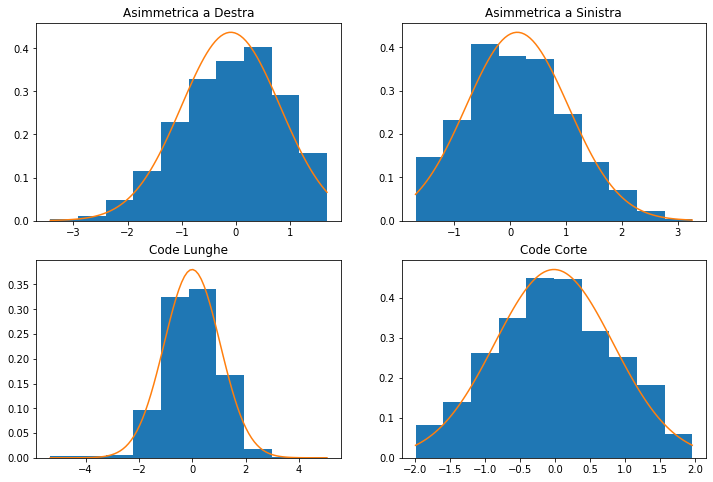

In [26]:
asimmetrica_sinistra = np.sort(np.random.normal(0,1,1000))[50:] #genero una distribuzione simmetrica e "la taglio"
asimmetrica_destra = np.sort(np.random.normal(0,1,1000))[:950] #genero una distribuzione simmetrica e "la taglio"

code_lunghe = np.random.normal(0,1,1000)
code_lunghe[np.abs(code_lunghe)>2.5]*=1.5 #"allunghiamo" le code
code_corte = np.random.normal(0,1,1000)
code_corte[np.abs(code_corte)>2]*=0.1#"accorciamo" le code

plt.figure(figsize=(12,8))

plt.subplot(221)
plt.hist(asimmetrica_destra,density=True)
plt.title('Asimmetrica a Destra')
g = norm(asimmetrica_destra.mean(),asimmetrica_destra.std())
x=np.linspace(np.min(asimmetrica_destra),np.max(asimmetrica_destra),100)
plt.plot(x,g.pdf(x))

plt.subplot(222)
plt.hist(asimmetrica_sinistra, density=True)
plt.title('Asimmetrica a Sinistra')
g = norm(asimmetrica_sinistra.mean(),asimmetrica_sinistra.std())
x=np.linspace(np.min(asimmetrica_sinistra),np.max(asimmetrica_sinistra),100)
plt.plot(x,g.pdf(x))

plt.subplot(223)
plt.hist(code_lunghe, density=True)
g = norm(code_lunghe.mean(),code_lunghe.std())
x=np.linspace(np.min(code_lunghe),np.max(code_lunghe),100)
plt.plot(x,g.pdf(x))
plt.title('Code Lunghe')
#plt.xlim([-8,8])

plt.subplot(224)
plt.hist(code_corte, density=True)
#plt.xlim([-5,5])
g = norm(code_corte.mean(),code_corte.std())
x=np.linspace(np.min(code_corte),np.max(code_corte),100)
plt.plot(x,g.pdf(x))
plt.title('Code Corte')

plt.show()

Vediamo adesso che aspetto hanno i Q-Q Plot di queste curve:

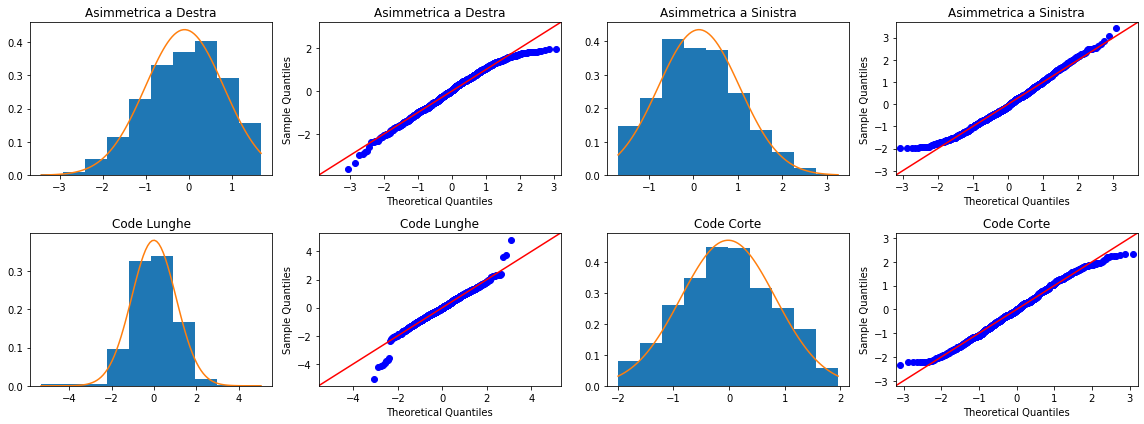

In [27]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.hist(asimmetrica_destra, density=True)
g = norm(asimmetrica_destra.mean(),asimmetrica_destra.std())
x=np.linspace(np.min(asimmetrica_destra),np.max(asimmetrica_destra),100)
plt.plot(x,g.pdf(x))
plt.title('Asimmetrica a Destra')

ax=plt.subplot(242)
qqplot(asimmetrica_destra, fit=True, line ='45', ax=ax)
plt.title('Asimmetrica a Destra')

plt.subplot(243)
plt.hist(asimmetrica_sinistra, density=True)
g = norm(asimmetrica_sinistra.mean(),asimmetrica_sinistra.std())
x=np.linspace(np.min(asimmetrica_sinistra),np.max(asimmetrica_sinistra),100)
plt.plot(x,g.pdf(x))
plt.title('Asimmetrica a Sinistra')

ax=plt.subplot(244)
qqplot(asimmetrica_sinistra, fit=True, line ='45', ax=ax)
plt.title('Asimmetrica a Sinistra')

plt.subplot(245)
plt.hist(code_lunghe, density=True)
g = norm(code_lunghe.mean(),code_lunghe.std())
x=np.linspace(np.min(code_lunghe),np.max(code_lunghe),100)
plt.plot(x,g.pdf(x))
plt.title('Code Lunghe')

ax=plt.subplot(246)
qqplot(code_lunghe, fit=True, line ='45', ax=ax)
plt.title('Code Lunghe')

plt.subplot(247)
plt.hist(code_corte, density=True)
g = norm(code_corte.mean(),code_corte.std())
x=np.linspace(np.min(code_corte),np.max(code_corte),100)
plt.plot(x,g.pdf(x))
plt.title('Code Corte')

ax=plt.subplot(248)
qqplot(code_corte, fit=True, line ='45', ax=ax)
plt.title('Code Corte')

plt.tight_layout()
plt.show()

Ogni volta che osserviamo un Q-Q Plot, possiamo ricondurre questi caratteri a delle caratteristiche della distribuzione. Chiaramente i vari caratteri possono anche combinarsi dando origine a Q-Q Plot più complessi come quello visto nel caso dei pesi. Adesso abbiamo gli strumenti per analizzare il Q-Q Plot dei pesi. Plottiamolo di nuovo:

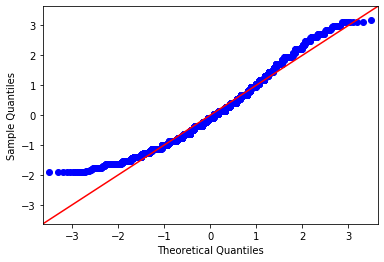

In [28]:
qqplot(data['weight'], fit=True, line='45')
plt.show()

Analizziamo il plot:
 * La devizione per i quantili inferiori a -1 suggerisce una asimmetria a sinistra (vedi Q-Q Plot per "Asimmetrica a Sinistra");
 * La deviazione per i quantili superiori a 2 indica che ci sono più valori alti di quanti dovrebbero essercene in una Gaussiana, dunque la coda destra è po' più "lunga" del dovuto;
 * I punti sotto la diagonale intorno al quantile $0$ indica che il picco della distribuzione è più basso di quanto dovrebbe essere nel caso di una Gaussiana.

### 7.8 Test Chi Quadrato di Pearson

Abbiamo visto come verificare in maniera **qualitativa** se un dato campione segue una **distribuzione nota**. Se vogliamo avere un dato quantitativo, possiamo effettuare un **test statistico** che miri a verificare qualora **il campione segua una distribuzione nota**. Un test utile in tal senso è il test **Chi Quadrato di Pearson**. 

Il test Chi Quadrato di Pearson valuta quanto sia verosimile che le differenze osservate tra due insiemi di dati siano dovute al caso. Più in generale, data una distribuzione di frequenze **osservate** e una distribuzione di frequenze **attese**, il testi Chi Quadrato di Pearson mira a rigettare l'ipotesi nulla che **la distribuzione delle frequenze osservate in un campione è consistente con la distribuzione delle frequenze attese**. 

Supponiamo di avere un insieme di elementi $n$ **raggruppati** in $k$ gruppi (si pensi ai bin di un istogramma) tali che $n_i$ è il numero di elementi appartenenti al gruppo i-esimo (possiamo vedere questo numero come i valori dei diversi bin dell'istogramma). I valori di $n_i$ rappresentano le frequenze **osservate**. Supponiamo inoltre di avere delle frequenze **attese** $E_i$. Queste frequenze possono essere calcolate mediante una distribuzione nota o osservate da un altro campione. Definiamo dunque la seguente statistica:

\begin{equation}
X^2 = \sum_{i=1}^{k}\frac{(n_i -E_i)^2}{E_i}.
\end{equation}

Si ha che $X^2$ segue una distribuzione Chi Quadro con $k-1$ gradi di libertà$^*$ $\mathcal{X}^2_{k-1}$. Se le frequenze empiriche e teoriche sono molto simili, $X^2$ assume un valore piccolo e dunque l'ipotesi nulla **è accettata** (il campione è stato estratto dalla distribuzione nota).<br>
Come facciamo a determinare se $X^2$ è sufficientemente piccolo o grande? Generalmente si sceglie un **livello di significatività (spesso si sceglie <b>0.05</b>)** e si calcola la probabilità di ottenere un risultato uguale o "più estremo" di quello osservato, supposta vera l'ipotesi nulla.
Questo valore si chiama "<b>p-value</b>" e indica quanto è probabile che le nostre conclusioni siano dovute al caso. Se il p-value si trova al di sotto del livello di significatività, l'ipotesi nulla è rigettata e possiamo dedurre che le distribuzioni di frequenze non sono compatibili  e che i dati osservati sono **statisticamente significativi**. Se il p-value assume valori superiori al livello di significatività, non possiamo rigettare l'ipotesi nulla. In particolare, se il p-value assume valori molto alti (prossimi a $1$), è molto probabile che le differenze osservate tra le distribuzioni di frequenze siano dovute al caso. Per poter giudicare il test valido, bisogna verificare che ogni frequenza abbia un valore almeno pari a $5$.

$^*$ vedremo in realtà che il calcolo del numero dei gradi di libertà dipende da come effettuiamo il test (esso rappresenta il numero minimo di dati sufficienti a valutare la quantità d'informazione contenuta nella statistica)

Esistono diverse varianti del test Chi-Quadro. Ne vedremo in particolare due:
 * Il test di bontà dell'adattamento (goodness of fit) - per verificare se un campione segue una determinata distribuzione di probabilità nota a priori;
 * Il test di indipendenza - per verificare se due variabili categoriche sono indipendenti.

#### 7.8.1 Test Chi-Quadro di Pearson per la bontà dell'adattamento (goodness of fit)

Questa variante del test mira a verificare se un campione è stato estratto da una data popolazione. In questo caso, le frequenze attese $E_i$ verranno generate mediante la distribuzione di probabilità della popolazione, mentre le frequenze osservate verranno calcolate mediante un istogramma. Bisogna stare attenti però a calcolare frequenze attese e osservate utilizzando gli stessi bin. Si può dunque procedere a effettuare il test Chi-Quadrato confrontando i due set di frequenze. Se i parametri della distribuzione della popolazione sono noti, la statistica $X^2$ calcolata seguirà una distribuzione Chi Quadrato con $k-1$ gradi di libertà (dove $k$ è il numero di bin rispetto al quale sono state calcolate le frequenze). Se i parametri della popolazione non sono noti, si dovrà procedere a stimare tali parametri dal campione. In tal caso la statistica $X^2$ seguirà una distribuzione Chi Quadrato con $k-1-n$ gradi di libertà, dove $n$ è il numero di parametri della distribuzione (es., $2$ nel caso di una Gaussiana - media e deviazione standard).

Per effettuare il test chi quadrato, utilizzeremo la funzione `chi_square` di `scipy.stats`. Le frequenze osservate e teoriche vanno calcolate manualmente. Vediamo due esempi in cui i parametri della popolazione sono rispettivamente noti e non noti.

##### 7.8.1.1 Test Chi-Quadrato per verificare l'appartenenza di una campione a una popolazione con distribuzione di parametri noti

In questo esempio, vedremo come verificare l'appartenenza del campione a una popolazione di distribuzione di parametri noti. Genereremo un campione casuale di valori definiti secondo una distribuzione normale con media nulla e deviazione standard unitaria. Verificheremo dunque se questo campione segue una distribuzione normale (parametri noti).

In [29]:
from scipy.stats import chisquare
np.random.seed(123)
#generiamo un campione casuale distribuito secondo una distribuzione normale
sample = np.random.normal(0,1,1000)

#costruiamo una distribuzione teorica normale di parametri noti
g = norm(0,1)

#per calcolare le frequenze, dobbiamo suddividere i dati in bin
#generiamo 11 bordi (per 10 bin) che spaziano uniformemente
#tra il valore che contiene l'1% della gaussiana e quello che
#contiene il 99% della gaussiana
edges = np.linspace(g.ppf(0.01),g.ppf(0.99),11)

#calcoliamo le probabilità cumulative che si hanno in corrispondenza degli edge scelti
cumulative_probs = g.cdf(edges)
#calcoliamo dunque le probabilità di ogni bin sottraendo la probabilità
#cumulativa i-esima alla (i+1)-esima. Questo si ottiene mediante np.diff
probs = np.diff(cumulative_probs)

#otteniamo le frequenze teoriche moltiplicando le probabilità per il numero di elementi
frequenze_teoriche = probs*len(sample)

#calcoliamo l'istogramma con gli stessi edges
#per ottenere le frequenze empiriche mediante np.histogram
frequenze_empiriche, _ = np.histogram(sample,edges)

#controlliamo che le tutte le frequenze siano almeno pari a 5
#se la condizione non è verificata, il codice terminerà con un errore
assert(frequenze_teoriche.min()>=5)
assert(frequenze_empiriche.min()>=5)

print("Statistica %0.4f, p-value: %0.4f"%chisquare(frequenze_empiriche,frequenze_teoriche))
print("(Frequenze Osservate, Frequenze Teoriche):")
list(zip(frequenze_empiriche,frequenze_teoriche))

Statistica 9.0102, p-value: 0.4363
(Frequenze Osservate, Frequenze Teoriche):


[(26, 21.366560126703543),
 (52, 50.019491099561975),
 (99, 94.65995066463478),
 (134, 144.8232081463074),
 (198, 179.1307899627923),
 (178, 179.13078996279242),
 (122, 144.82320814630734),
 (100, 94.65995066463474),
 (55, 50.01949109956194),
 (18, 21.366560126703572)]

Abbiamo ottenuto una statistica non molto alta e un p-value alto. Ricordiamo che il p-value è definito come la probabilità, supposta l'ipotesi nulla, di ottenere un risultato (dai dati osservati) uguale o "più estremo" di quello osservato (e dunque se le frequenze sono "compatibili" o meno). Dato che il p-value supera il livello di significatività $0.05$, non possiamo rigettare l'ipotesi nulla e dunque non possiamo dire che le due distribuzioni sono diverse.

Vediamo un esempio analogo in cui generiamo un campione mediante una distribuzione uniforme tra -3 e 3. Questa distribuzione è diversa da quella teorica, quindi ci aspettiamo un diverso esito del test. Seguiamo i medesimi passi visti in precedenza:

In [30]:
np.random.seed(123)
sample = np.random.uniform(-3,3,1000)

g = norm(0,1)

edges = np.linspace(g.ppf(0.01),g.ppf(0.99),11)

cumulative_probs = g.cdf(edges)
probs = np.diff(cumulative_probs)

frequenze_teoriche = probs*len(sample)

frequenze_empiriche, _ = np.histogram(sample,edges)

assert(frequenze_teoriche.min()>=5)
assert(frequenze_empiriche.min()>=5)

print("Statistica %0.4f, p-value: %0.4f"%chisquare(frequenze_empiriche,frequenze_teoriche))
print("(Frequenze Osservate, Frequenze Teoriche):")
list(zip(frequenze_empiriche,frequenze_teoriche))

Statistica 381.3167, p-value: 0.0000
(Frequenze Osservate, Frequenze Teoriche):


[(55, 21.366560126703543),
 (87, 50.019491099561975),
 (84, 94.65995066463478),
 (87, 144.8232081463074),
 (84, 179.1307899627923),
 (80, 179.13078996279242),
 (73, 144.82320814630734),
 (85, 94.65995066463474),
 (66, 50.01949109956194),
 (74, 21.366560126703572)]

In questo caso, la statistica è molto alta e p-value è nullo. Possiamo rigettare l'ipotesi nulla e dedurre che **il campione non segue una distribuzione Gaussiana di media nulla e deviazione standard unitaria**.

##### 7.8.1.2 Test Chi-Quadrato per verificare l'appartenenza di una campione a una popolazione con distribuzione di parametri non noti

Ripetiamo l'esempio precedente nel caso in cui i parametri della distribuzione non siano noti. Il test viene effettuato nello stesso modo ma dobbiamo ricordarci:
 * di fittare la distribuzione ai dati;
 * di specificare `ddof=n` dove $n$ è il numero di parametri della distribuzione ($2$ nel caso della Gaussiana).

In [31]:
np.random.seed(123)
#genearimo un campione che segue una distribuzione Gaussiana
#di media -2 e deviazione standard 3.2
sample = np.random.normal(-2,3.2,1000)

#effetuiamo il fit della distribuzione ai dati
parameters = norm.fit(sample)
g = norm(*parameters)

#possiamo ottenere il numero di parametri della distribuzione
#calcolando il numero di elementi di parameters
num_par = len(parameters)

edges = np.linspace(g.ppf(0.01),g.ppf(0.99),11)

cumulative_probs = g.cdf(edges)
probs = np.diff(cumulative_probs)

frequenze_teoriche = probs*len(sample)

frequenze_empiriche, _ = np.histogram(sample,edges)

assert(frequenze_teoriche.min()>=5)
assert(frequenze_empiriche.min()>=5)

#ricordiamoci di specificare ddof=num_par
print("Statistica %0.4f, p-value: %0.4f"%chisquare(frequenze_empiriche,frequenze_teoriche,ddof=num_par))
print("(Frequenze Osservate, Frequenze Teoriche):")
list(zip(frequenze_empiriche,frequenze_teoriche))

Statistica 10.8376, p-value: 0.1459
(Frequenze Osservate, Frequenze Teoriche):


[(20, 21.366560126703543),
 (47, 50.01949109956192),
 (104, 94.65995066463489),
 (130, 144.82320814630734),
 (188, 179.1307899627923),
 (192, 179.13078996279253),
 (119, 144.82320814630722),
 (106, 94.65995066463483),
 (56, 50.01949109956183),
 (20, 21.366560126703572)]

Anche in questo caso non possiamo rigettare l'ipotesi nulla in quanto la statistica è bassa e il p-value è alto. Non possiamo confutare che il campione segua una distribuzione Gaussiana.

#### 7.8.2 Test Chi-Quadro di Pearson di Indipendenza

Questa variante del test permette di verificare se due campioni sono indipendenti e derivano dalla stessa distribuzione di probabilità (non serve che sia nota). Questo test è molto usato per verificare che le differenze di frequenze osservate per due o più campioni sono statisticamente significative o dovute al caso. Vediamo un esempio utilizzando il dataset Titanic:

In [32]:
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Consideriamo i campioni diversi degli uomini e delle donne e studiamo come i passeggeri si distribuiscono nelle tre classi. Siamo interessati a capire se esistono differenze rilevanti tra le distribuzioni dei passeggeri nelle tre classi quando consideriamo distintamente uomini e donne. Iniziamo costruendo una crosstab:

In [33]:
tab = pd.crosstab(titanic['Sex'], titanic['Pclass'])
tab

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


Le due righe della tabella rappresentano le frequenze di due campioni. Per capire se sussistono differenze tra le distribuzioni, normalizziamo per righe e visualizziamo uno stacked plot:

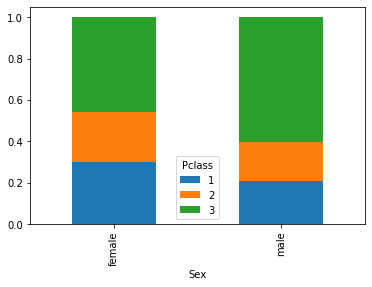

In [34]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize='index').plot.bar(stacked=True)
plt.show()

Osservando il diagramma, semberebbe che la percentuale di uomini imbarcati in terza classe sia superiore rispetto alla percentuale di donne imbarcate in terza classe. Vogliamo capire se queste differenze apparenti sono anche statisticamente rilevanti. In particolare, vogliamo appurare che i due campioni non siano indipendenti e appartenenti alla stessa distribuzione (ciò confermerebbe che i campioni seguono distribuzioni diverse e la variabile "sex" ha un impatto sulla distribuzione delle frequenze). 

Il test in questione si effettua seguendo questi passi:

 1. Si calcola la matrice di contingenza non normalizzata che riporti le frequenze osservate (quella costruita mediante crosstab);
 * Si calcolano le frequenze attese, ovvero quelle che ci aspetteremmo se i due campioni fossero indipendenti;
 * Si effettua un test Chi-Quadrato per testare l'ipotesi nulla che le frequenze osservate e quelle teoriche seguano la stessa distribuzione.
 
Se otteniamo un p-value al di sotto del livello di significatività, possiamo rigettare l'ipotesi nulla e dunque le frequenze attese non sono compatibili con quelle osservate. Possiamo dunque dedurre che i due campioni **non sono indipendenti** (e che la variabile "sex" influisce sulla distribuzione dei dati).

Utilizzeremo la funzione `chi2_contingency` per effettuare gli ultimi due passi in maniera automatica a partire dalla tabella di contingenza. Vediamo come:

In [35]:
from scipy.stats import chi2_contingency
tab=pd.crosstab(titanic['Sex'], titanic['Pclass']) #crosstab non normalizzata
chi2_contingency(tab)

(16.971499095517114,
 0.00020638864348233114,
 2,
 array([[ 76.12121212,  64.84399551, 173.03479237],
        [139.87878788, 119.15600449, 317.96520763]]))

La funzione `chi2_contingency` restituisce $4$ risultati:
 * La statistica $\chi^2$;
 * Il p-value;
 * Il numero di gradi di libertà della distribuzione $\chi^2$;
 * Le frequenze attese nel caso in cui i due campioni fossero indipendenti.
 
Dato che abbiamo ottenuto un p-value basso ($<0.05$), possiamo concludere che le differenze osservate sono statisticamente rilevanti.

Vediamo cosa succede se restringiamo l'analisi solo alla prima e seconda classe:

In [36]:
t2 = titanic[titanic['Pclass']!=3] #selezioniamo solo prima e seconda classe
tab=pd.crosstab(t2['Sex'], t2['Pclass']) #crosstab non normalizzata
tab

Pclass,1,2
Sex,,
female,94,76
male,122,108


Notiamo conteggi diversi per uomini e donne in prima e seconda classe. Calcoliamo e plottiamo le frequenze relative:

Pclass         1         2
Sex                       
female  0.552941  0.447059
male    0.530435  0.469565


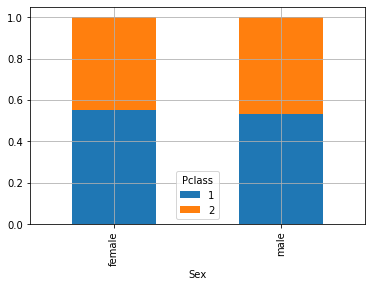

In [37]:
print(pd.crosstab(t2['Sex'], t2['Pclass'], normalize='index'))
pd.crosstab(t2['Sex'], t2['Pclass'], normalize='index').plot.bar(stacked=True)
plt.grid()
plt.show()

Notiamo che le differenze ci sono ma sono molto piccole. Verifichiamone la rilevanza statistica mediante il test $\chi^2$:

In [38]:
chi2_contingency(tab)

(0.11902261429671676, 0.7300969700763549, 1, array([[ 91.8,  78.2],
        [124.2, 105.8]]))

Abbiamo ottenuto un p-value molto alto. Non possiamo rigettare l'ipotesi nulla e dunque concludiamo che le differenze osservate non sono statisticamente rilevanti.

Si noti che il test Chi-Quadrato di Pearson generalizza al caso in cui si considerano più di due campioni. In questo caso, la matrice di contingenza avrà tre o più righe. Il test viene dunque effettuato allo stesso modo.

## - Distribuzioni di Probabilità - FINE 